### Plotting CNRM data vs Satellite data for the Siberian sea region

In [154]:
# Load useful packages
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from datetime import datetime, timedelta
import numpy as np
import pyproj
from dask.diagnostics import ProgressBar
import matplotlib.dates as mdate
import intake
import cftime

### Import CMIP data

In [2]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon','Omon','Ofx'], 
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [6]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
dset_dict.keys()

dict_keys(['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn'])

In [8]:
area = dset_dict[list(dset_dict.keys())[0]]
si = dset_dict[list(dset_dict.keys())[1]]
no3 = dset_dict[list(dset_dict.keys())[2]]

In [9]:
# Select region of interest from the Areacello variable: Siberian Sea
SS = area.areacello.where((area.lat>=70) & 
                          (area.lat<=80) & 
                          (area.lon <= 160) & 
                          (area.lon >= 100), drop = True)

In [10]:
SS = SS.isel(member_id = 0)

### Nitrate concentration

In [13]:
no3_surf = no3.isel(lev = 0)
no3_en = no3_surf.mean(dim = ['member_id'], keep_attrs=True)
no3_SS = no3_en.where((no3_en.lat>=70) & 
                      (no3_en.lat<=80) & 
                      (no3_en.lon >=100) & 
                      (no3_en.lon <= 160),drop = True)

In [84]:
no3_SS_mon = no3_SS.groupby('time.month').mean(dim=['time'])

In [86]:
with ProgressBar():
    september_NO3 = no3_SS_mon.sel(month = 9).compute()

[########################################] | 100% Completed | 244.85 s


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


In [98]:
# Select for the years that match the observations
no3_obs = no3_SS.sel(time = slice('2002','2014'))
no3_obs_m = no3_obs.groupby('time.month').mean(dim=['time'])

In [99]:
no3_obs_m

<xarray.Dataset>
Dimensions:     (month: 12, y: 30, x: 37, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lev         float64 0.5058
    lon         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lev_bounds  (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * month       (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    no3         (month, y, x) float32 dask.array<chunksize=(1, 30, 37), meta=np.ndarray>

In [100]:
with ProgressBar():
    no3_obs_sep = no3_obs_m.sel(month = 9).compute()

[########################################] | 100% Completed | 20.66 s


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


In [82]:
no3_SS_mon_obs

<xarray.Dataset>
Dimensions:     (y: 30, x: 37, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lev         float64 0.5058
    lon         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lev_bounds  (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    month       int64 9
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    no3         (y, x) float32 dask.array<chunksize=(30, 37), meta=np.ndarray>

In [14]:
# Calulated the area weighted average 
no3_weighted = (SS*no3_SS).sum(dim=('y','x'))/SS.sum(dim=('y','x'))

In [15]:
# Create a monthly mean and standard deviation for entire time period (1850 to 2014)
no3_monthly = no3_weighted.groupby('time.month').mean(dim=['time']).compute()
no3_monthly_sd = no3_weighted.groupby('time.month').std(dim=['time']).compute()

In [16]:
# Select for the years that match the observations
no3_obs = no3_weighted.sel(time = slice('2002','2014'))

In [17]:
# Create a monthly mean and standard deviation for time period with observations (2002 to 2014)
no3obs_monthly = no3_obs.groupby('time.month').mean(dim=['time']).compute()
no3obs_monthly_sd = no3_obs.groupby('time.month').std(dim=['time']).compute()

### Sea Ice extent

In [131]:
# Average over the ensembles
si_en = si.mean(dim = ['member_id'], keep_attrs=True)
# Select area of interest: Chuckchi Sea
si_SS = si_en.where((si_en.lat>= 70) & 
                         (si_en.lat<= 80) & 
                         (si_en.lon>= 100) & 
                         (si_en.lon<= 160), drop = True)

In [132]:
si_SS_mon = si_SS.groupby('time.month').mean(dim=['time'])

In [133]:
with ProgressBar():
    september_SI = si_SS_mon.sel(month = 9).compute()

[########################################] | 100% Completed | 5.79 ss


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


In [102]:
si_obs = si_SS.sel(time = slice('2002','2014'))
si_obs_m = si_obs.groupby('time.month').mean(dim=['time'])

In [103]:
with ProgressBar():
    si_obs_sep = si_obs_m.sel(month = 9).compute()

[########################################] | 100% Completed | 1.44 sms


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [20]:
# Area weighted average of extent over the region
iceExtent = ((xr.where(si_SS['siconc']>15, 1.,0))*SS).sum(dim=['y','x'])

In [21]:
# Create a monthly mean and standard deviation for entire period
iceExt_monthly = iceExtent.groupby('time.month').mean().compute()
iceExt_monthly_sd = iceExtent.groupby('time.month').std().compute()

In [22]:
si_obs = iceExtent.sel(time = slice('2002','2014'))

In [23]:
# Create a monthly mean and standard deviation for observational period
iceobs_Ext_monthly = si_obs.groupby('time.month').mean().compute()
iceobs_Ext_monthly_sd = si_obs.groupby('time.month').std().compute()

### Include Satellite observations

In [24]:
# Import SIC observations
sat = xr.open_mfdataset("SICdata/AMSR*.nc", combine='by_coords')

In [25]:
# Change co-ordinates
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file
projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)

xx, yy = np.meshgrid( sat.x.values, sat.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
sat['lon'] = (('y','x'),lon)
sat['lat'] = (('y','x'),lat)

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_915/3463951465.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.tr

In [26]:
# Select area of interest: Siberian Sea
sat_SS = sat.where((sat.lon>=100) & 
                   (sat.lon<=160) & 
                   (sat.lat <=80 ) & 
                   (sat.lat >= 70),drop = True)

In [28]:
cell = 6.25**2
sat_Ext = (xr.where(sat_SS.z>15, 1.,0).sum(dim=['x','y']))*cell
sat_Ext_monthly = sat_Ext.groupby('time.month').mean().compute()
sat_Ext_monthly_sd = sat_Ext.groupby('time.month').std().compute()

In [30]:
# Select= time period of observations
sat_obs = sat_Ext.sel(time = slice('2002','2014'))

In [31]:
satobs_Ext_monthly = sat_obs.groupby('time.month').mean().compute()
satobs_Ext_monthly_sd = sat_obs.groupby('time.month').std().compute()

### Make a figure
* Comparing CNRM sea ice extent and nitrate concentration to 
    satellite derived sea ice extent for the Siberian Sea region from
    2002 to 2014

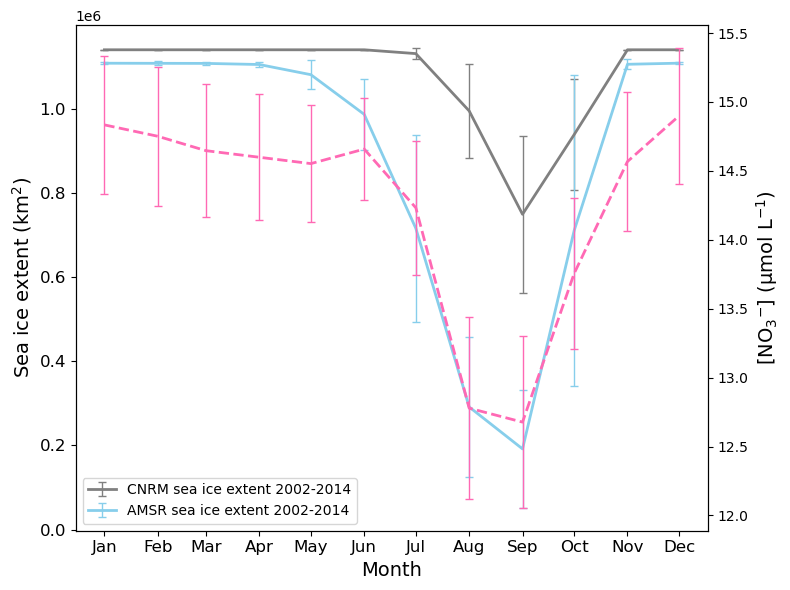

In [32]:

fig, ax = plt.subplots(figsize = (8,6))
with ProgressBar():
    ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceobs_Ext_monthly.month.values],
            iceobs_Ext_monthly/1e6, yerr = iceobs_Ext_monthly_sd/1e6, capsize = 3, elinewidth = 1,
                color='grey',
                lw = 2, label = 'CNRM sea ice extent 2002-2014',
           linestyle = '-')
ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceobs_Ext_monthly.month.values],
            satobs_Ext_monthly, yerr = satobs_Ext_monthly_sd, capsize = 3, elinewidth = 1,
                color='skyblue',
                lw = 2, label = 'AMSR sea ice extent 2002-2014',
           linestyle = '-')

ax2 = ax.twinx()
ax2.errorbar(x = [datetime.strptime(str(m).zfill(2), '%m') for m in iceobs_Ext_monthly.month.values],
            y = no3obs_monthly['no3']*1e3, yerr = no3obs_monthly_sd['no3']*1e3, capsize = 3, elinewidth = 1,
                color='hotpink',
                lw = 2, label = r'CNRM [NO${_3}^{-}$] 2002-2014',
           linestyle = '--')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel(r'Sea ice extent (km${^2})$', fontsize=14)
ax2.set_ylabel(r'[NO${_3}^{-}$] (μmol L$^{-1})$', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.legend(loc = 'best')
#ax2.legend(loc = 'best')
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(mdate.MonthLocator())
plt.tight_layout()

* This figures shows a comparison of CNRM sea ice extent and 
    surface ocean nitrate concentration in comparison to 
    satellite derived sea ice extent for their full time periods

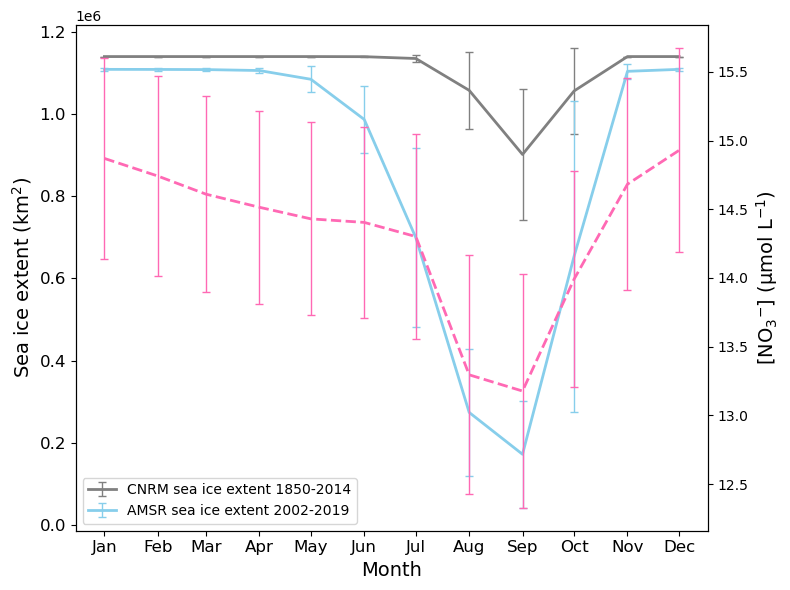

In [35]:
fig, ax = plt.subplots(figsize = (8,6))
with ProgressBar():
    ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            iceExt_monthly/1e6, yerr = iceExt_monthly_sd/1e6, capsize = 3, elinewidth = 1,
                color='grey',
                lw = 2, label = 'CNRM sea ice extent 1850-2014',
           linestyle = '-')
ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            sat_Ext_monthly, yerr = sat_Ext_monthly_sd, capsize = 3, elinewidth = 1,
                color='skyblue',
                lw = 2, label = 'AMSR sea ice extent 2002-2019',
           linestyle = '-')

ax2 = ax.twinx()
ax2.errorbar(x = [datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            y = no3_monthly['no3']*1e3, yerr = no3_monthly_sd['no3']*1e3, capsize = 3, elinewidth = 1,
                color='hotpink',
                lw = 2, label = r'CNRM [NO${_3}^{-}$] 1850-2014',
           linestyle = '--')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel(r'Sea ice extent (km${^2})$', fontsize=14)
ax2.set_ylabel(r'[NO${_3}^{-}$] (μmol L$^{-1})$', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.legend(loc = 'best')
#ax2.legend(loc = 'best')
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(mdate.MonthLocator())
plt.tight_layout()

In [33]:
#xvar = sat_Ext.groupby('time.month')[9]
#plt.hist(xvar, bins = 20)

* Figure comparing sea ice extent and nutrients for the entire period
    versus the last 12 years
  

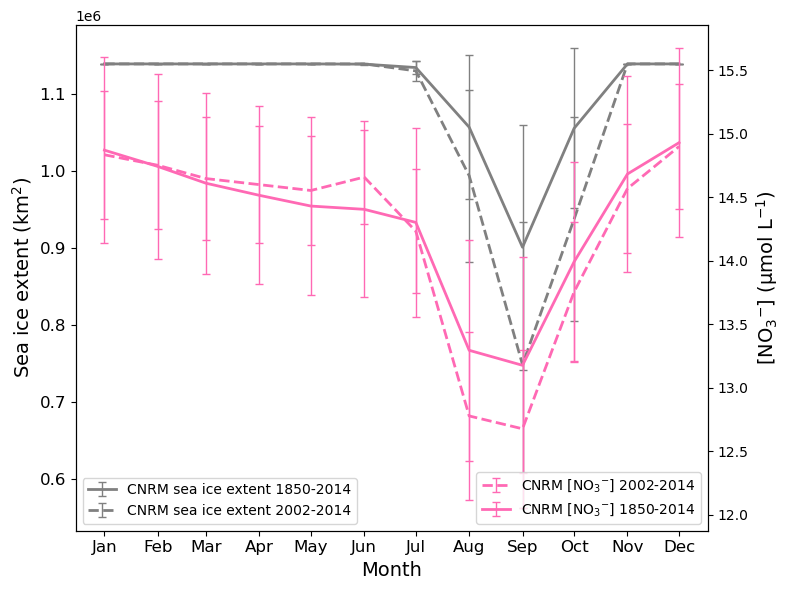

In [39]:
fig, ax = plt.subplots(figsize = (8,6))
with ProgressBar():
    ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            iceExt_monthly/1e6, yerr = iceExt_monthly_sd/1e6, capsize = 3, elinewidth = 1,
                color='grey',
                lw = 2, label = 'CNRM sea ice extent 1850-2014',
           linestyle = '-')
    ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            iceobs_Ext_monthly/1e6, yerr = iceobs_Ext_monthly_sd/1e6, capsize = 3, elinewidth = 1,
                color='grey',
                lw = 2, label = 'CNRM sea ice extent 2002-2014',
           linestyle = '--')
ax2 = ax.twinx()
ax2.errorbar(x = [datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            y = no3obs_monthly['no3']*1e3, yerr = no3obs_monthly_sd['no3']*1e3, capsize = 3, elinewidth = 1,
                color='hotpink',
                lw = 2, label = r'CNRM [NO${_3}^{-}$] 2002-2014',
           linestyle = '--')
ax2.errorbar(x = [datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            y = no3_monthly['no3']*1e3, yerr = no3_monthly_sd['no3']*1e3, capsize = 3, elinewidth = 1,
                color='hotpink',
                lw = 2, label = r'CNRM [NO${_3}^{-}$] 1850-2014',
           linestyle = '-')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel(r'Sea ice extent (km${^2})$', fontsize=14)
ax2.set_ylabel(r'[NO${_3}^{-}$] (μmol L$^{-1})$', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.legend(loc = 'best')
ax2.legend(loc = 'lower right')
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(mdate.MonthLocator())
plt.tight_layout()

In [61]:
si_SS_mon.sel(month = 9)

<xarray.Dataset>
Dimensions:     (y: 30, x: 37, nvertex: 4)
Coordinates:
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    type        |S6 b'typesi'
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    month       int64 9
Dimensions without coordinates: y, x, nvertex
Data variables:
    siconc      (y, x) float32 dask.array<chunksize=(30, 37), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


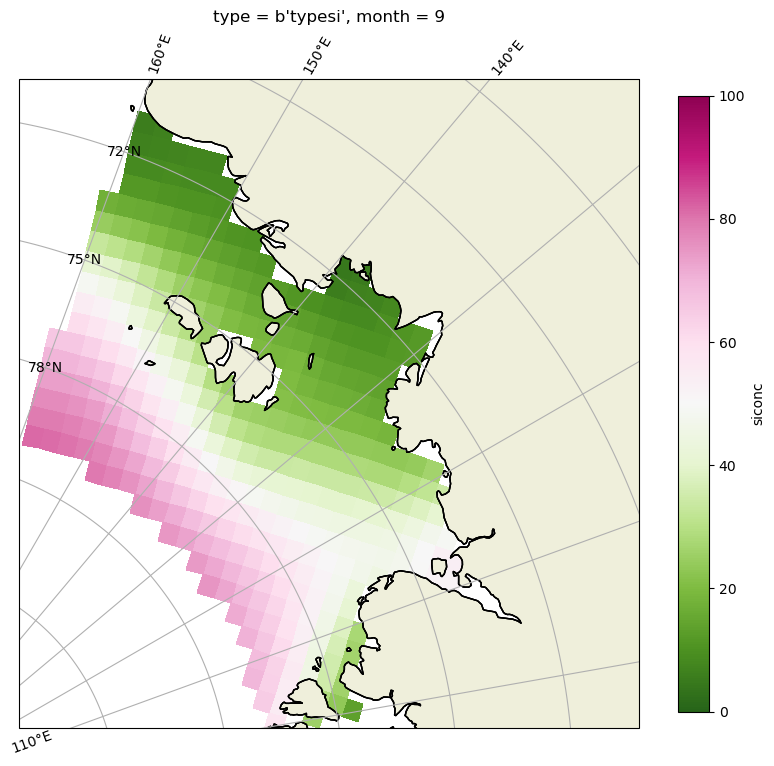

In [92]:
extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
si_SS_mon['siconc'].sel(month = 9).squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='PiYG_r',
    transform = ccrs.PlateCarree(),
    vmin = 0, vmax = 100,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_extent(extent, ccrs.PlateCarree())

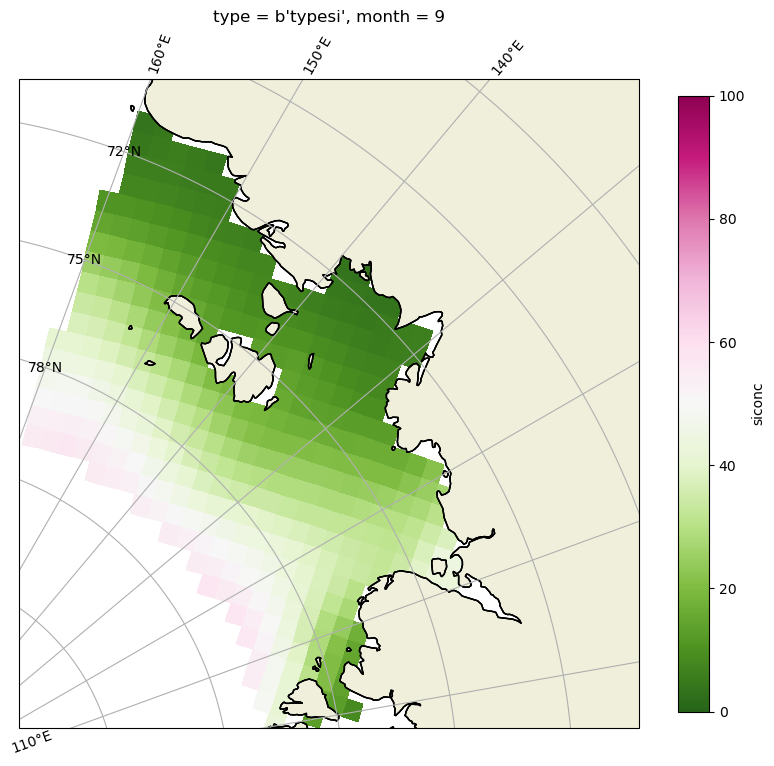

In [104]:
extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
si_obs_sep['siconc'].squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='PiYG_r',
    transform = ccrs.PlateCarree(),
    vmin = 0, vmax = 100,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_extent(extent, ccrs.PlateCarree())

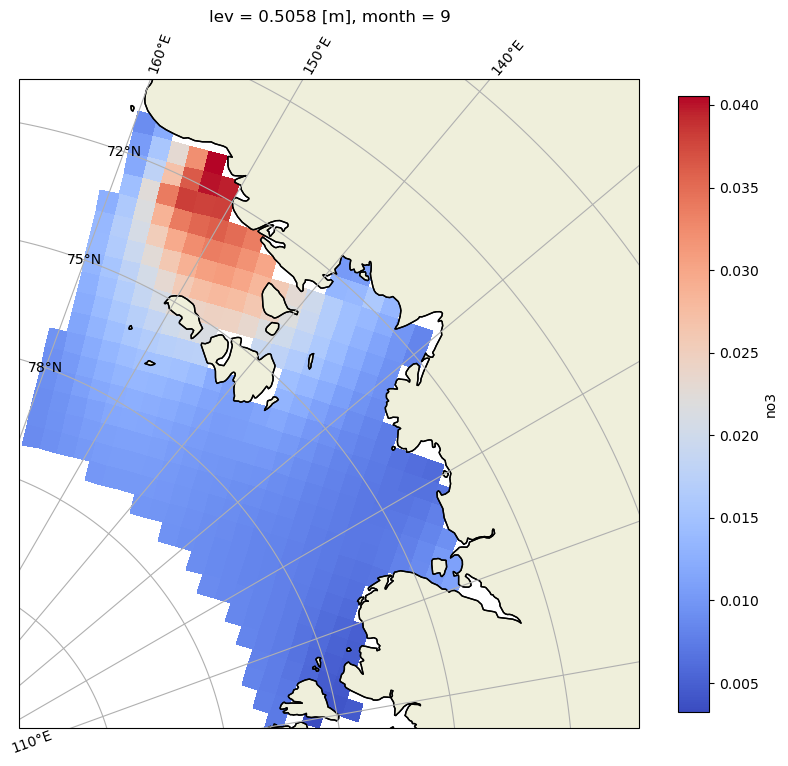

In [95]:
extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()
september_NO3['no3'].squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='coolwarm',
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_extent(extent, ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.RIVERS, zorder=2, edgecolor='blue' )

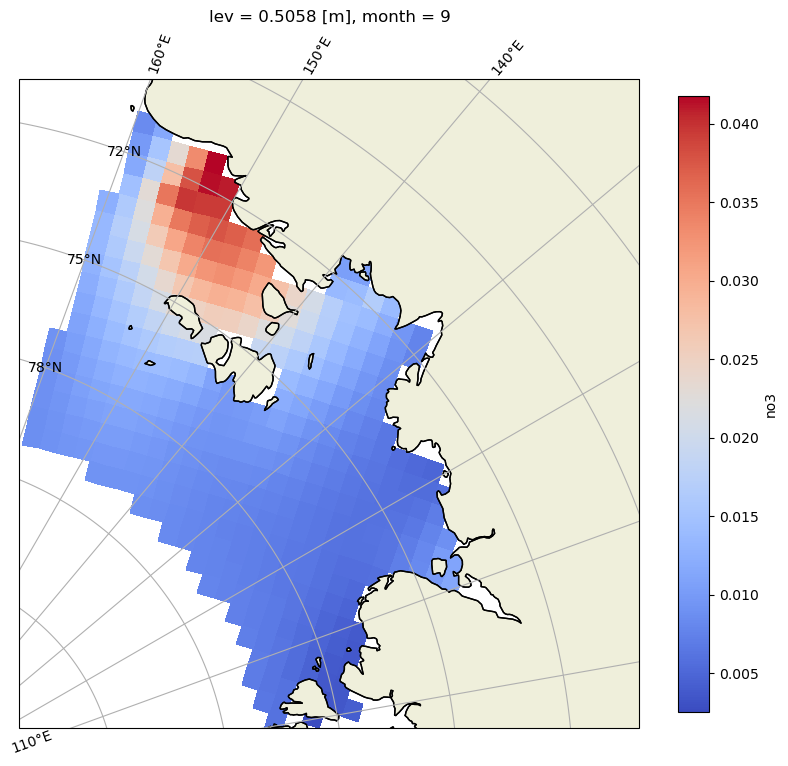

In [101]:
extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()
no3_obs_sep['no3'].squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='coolwarm',
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_extent(extent, ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.RIVERS, zorder=2, edgecolor='blue' )

* Create 4 subplots of the same map showing sea ice extent and nitrate concentration for both time periods

NameError: name 'x' is not defined

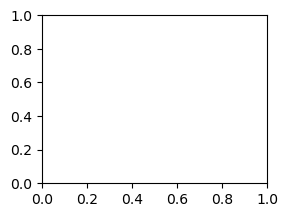

In [127]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.plot(x, y)


In [162]:
import Functions as f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


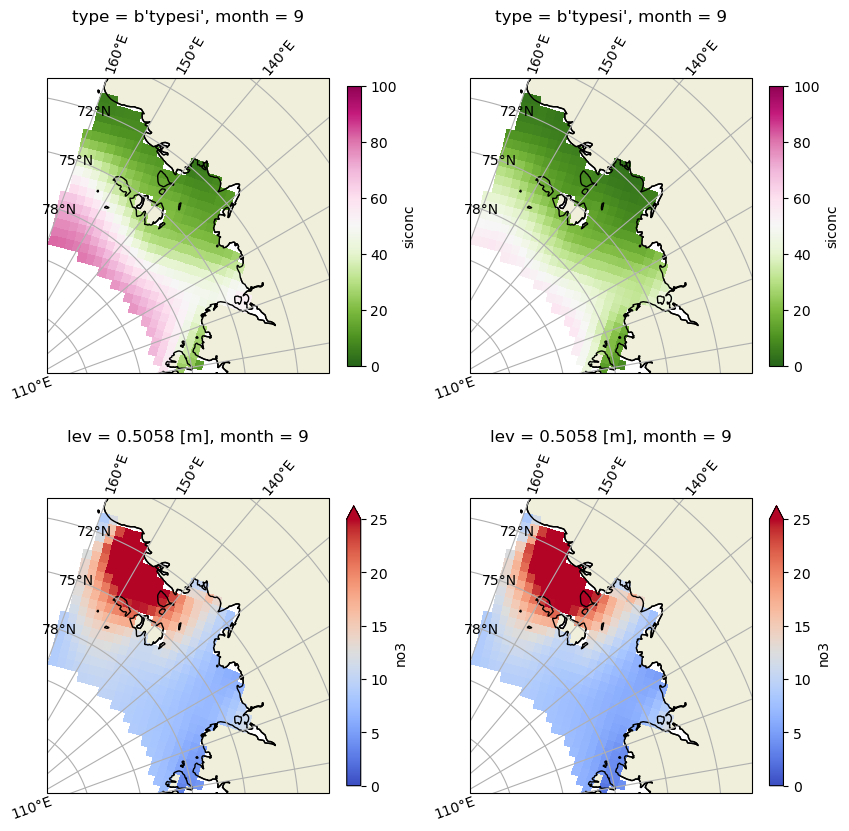

In [164]:
extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(2, 2, 1, projection=ccrs.NorthPolarStereo())
f.mapfeatures(ax,extent)
ax = september_SI['siconc'].plot.pcolormesh(x='lon', y='lat',
    cmap='PiYG_r',
    vmax = 100, vmin = 0,
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)

ax = plt.subplot(2, 2, 2, projection=ccrs.NorthPolarStereo() )
f.mapfeatures(ax,extent)
ax = si_obs_sep['siconc'].plot.pcolormesh(x='lon', y='lat',
    cmap='PiYG_r',
    vmax = 100, vmin = 0,
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax = plt.subplot(2, 2, 3, projection=ccrs.NorthPolarStereo() )
f.mapfeatures(ax,extent)
ax = (september_NO3['no3']*1e3).plot.pcolormesh(x='lon', y='lat',
    cmap='coolwarm',
    vmax =25 , vmin = 0,                                     
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
ax = plt.subplot(2, 2, 4, projection=ccrs.NorthPolarStereo() )
f.mapfeatures(ax,extent)
ax = (no3_obs_sep['no3']*1e3).plot.pcolormesh(x='lon', y='lat',
    cmap='coolwarm',
    vmax =25 , vmin = 0,
    transform = ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8}
)
